## Первое дз

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
# to draw pictures in jupyter notebook
%matplotlib inline
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

In [9]:
pip uninstall jedi --yes

Found existing installation: jedi 0.17.2
Uninstalling jedi-0.17.2:
  Successfully uninstalled jedi-0.17.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [5]:
data = pd.read_csv(DATA_URL + "adult.data.csv")
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [9]:
data[data['sex'] == 'Female'][ 'age']

4        28
5        37
6        49
8        31
12       23
         ..
32546    37
32549    43
32556    27
32558    58
32560    52
Name: age, Length: 10771, dtype: int64

In [15]:
data1 = data[data['native-country'] == 'Germany']

In [24]:
data[data['native-country'] == 'Germany'].shape[0] / data.shape[0] * 100

0.42074874850281013

In [ ]:
float((data["native-country"] == "Germany").sum()) / data.shape[0]

In [10]:
pip install pyreadline

     -------------------------------------- 109.2/109.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyreadline: filename=pyreadline-2.1-py3-none-any.whl size=93837 sha256=5bee2354f5cb0bd957a61a721e84710fdc3ea719089947e90932e581ab137ab5
  Stored in directory: c:\users\алексей\appdata\local\pip\cache\wheels\4d\c9\42\42ce63bbead3b4553087f8ad39f625586323bbac38f67f8d0d
Successfully built pyreadline
Note: you may need to restart the kernel to use updated packages.


In [37]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
data[data['salary'] == '<=50K']['age'].describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [33]:
data[data['salary'] == '>50K']['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [34]:
ages1 = data[data["salary"] == ">50K"]["age"]
ages2 = data[data["salary"] == "<=50K"]["age"]
print(
    "The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
        round(ages1.mean()),
        round(ages1.std(), 1),
        round(ages2.mean()),
        round(ages2.std(), 1),
    )
)

The average age of the rich: 44 +- 10.5 years, poor - 37 +- 14.0 years.


In [36]:
data[data['salary'] == '>50K']['education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

In [42]:
data.groupby(['race','sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

In [43]:
ages1.head()

7     52
8     31
9     42
10    37
11    30
Name: age, dtype: int64

In [78]:
data[(data['sex'] == 'Male') & (data['marital-status'].str.startswith('Married'))]['salary'].value_counts(normalize=True)

<=50K    0.559486
>50K     0.440514
Name: salary, dtype: float64

In [84]:
# single men
data[
    (data["sex"] == "Male")
    & ~(data["marital-status"].str.startswith("Married"))
]["salary"].value_counts(normalize=True)

<=50K    0.915505
>50K     0.084495
Name: salary, dtype: float64

In [45]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [81]:
data[data['hours-per-week'] == data['hours-per-week'].max()]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

In [86]:
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df["hours-per-week"].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

In [89]:
pd.crosstab(
    data["native-country"],
    data["salary"],
    values=data["hours-per-week"],
    aggfunc=np.mean,
).T

native-country,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
salary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
<=50K,40.164760,41.416667,37.914634,37.381818,38.684211,37.985714,42.338235,38.041667,36.030928,40.483333,41.058824,39.139785,41.809524,39.360656,36.325,40.0,34.333333,39.142857,31.3,38.233333,41.44,40.947368,39.625,38.239437,41.000000,40.375,40.003279,36.09375,41.857143,35.068966,38.065693,38.166667,41.939394,38.470588,39.444444,40.15625,33.774194,42.866667,37.058824,38.799127,37.193548,41.6
>50K,45.547945,40.000000,45.641026,38.900000,50.000000,42.440000,47.000000,48.750000,45.000000,44.533333,50.750000,44.977273,50.625000,36.666667,42.750,NaN,60.000000,45.000000,50.0,46.475000,47.50,48.000000,45.400,41.100000,47.958333,40.000,46.575758,37.50000,NaN,40.000000,43.032787,39.000000,41.500000,39.416667,46.666667,51.43750,46.800000,58.333333,40.000000,45.505369,39.200000,49.5


## Второе дз

In [154]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [155]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [156]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [157]:
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
pip install -U seaborn

     ------------------------------------ 293.3/293.3 kB 904.3 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.0
    Uninstalling seaborn-0.12.0:
      Successfully uninstalled seaborn-0.12.0
Note: you may need to restart the kernel to use updated packages.


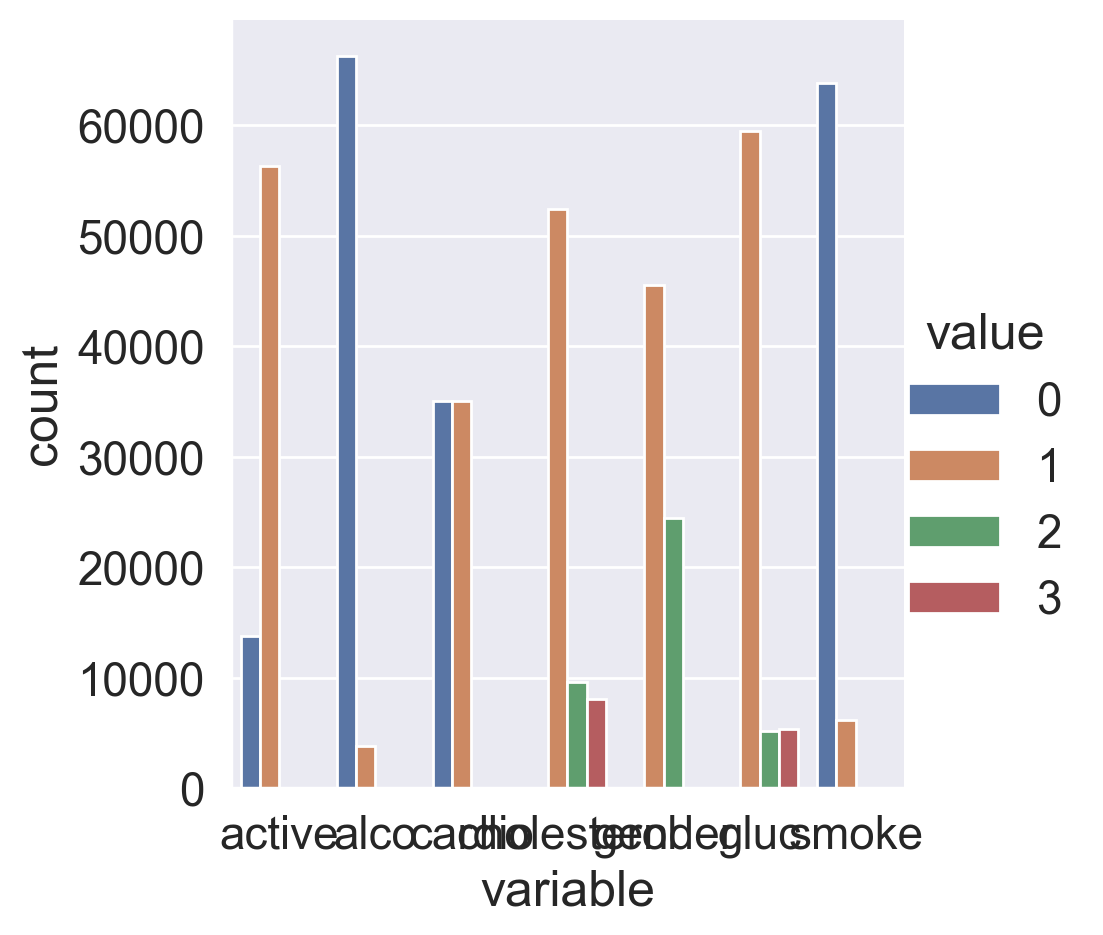

In [16]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
);

In [15]:
sns.catplot?

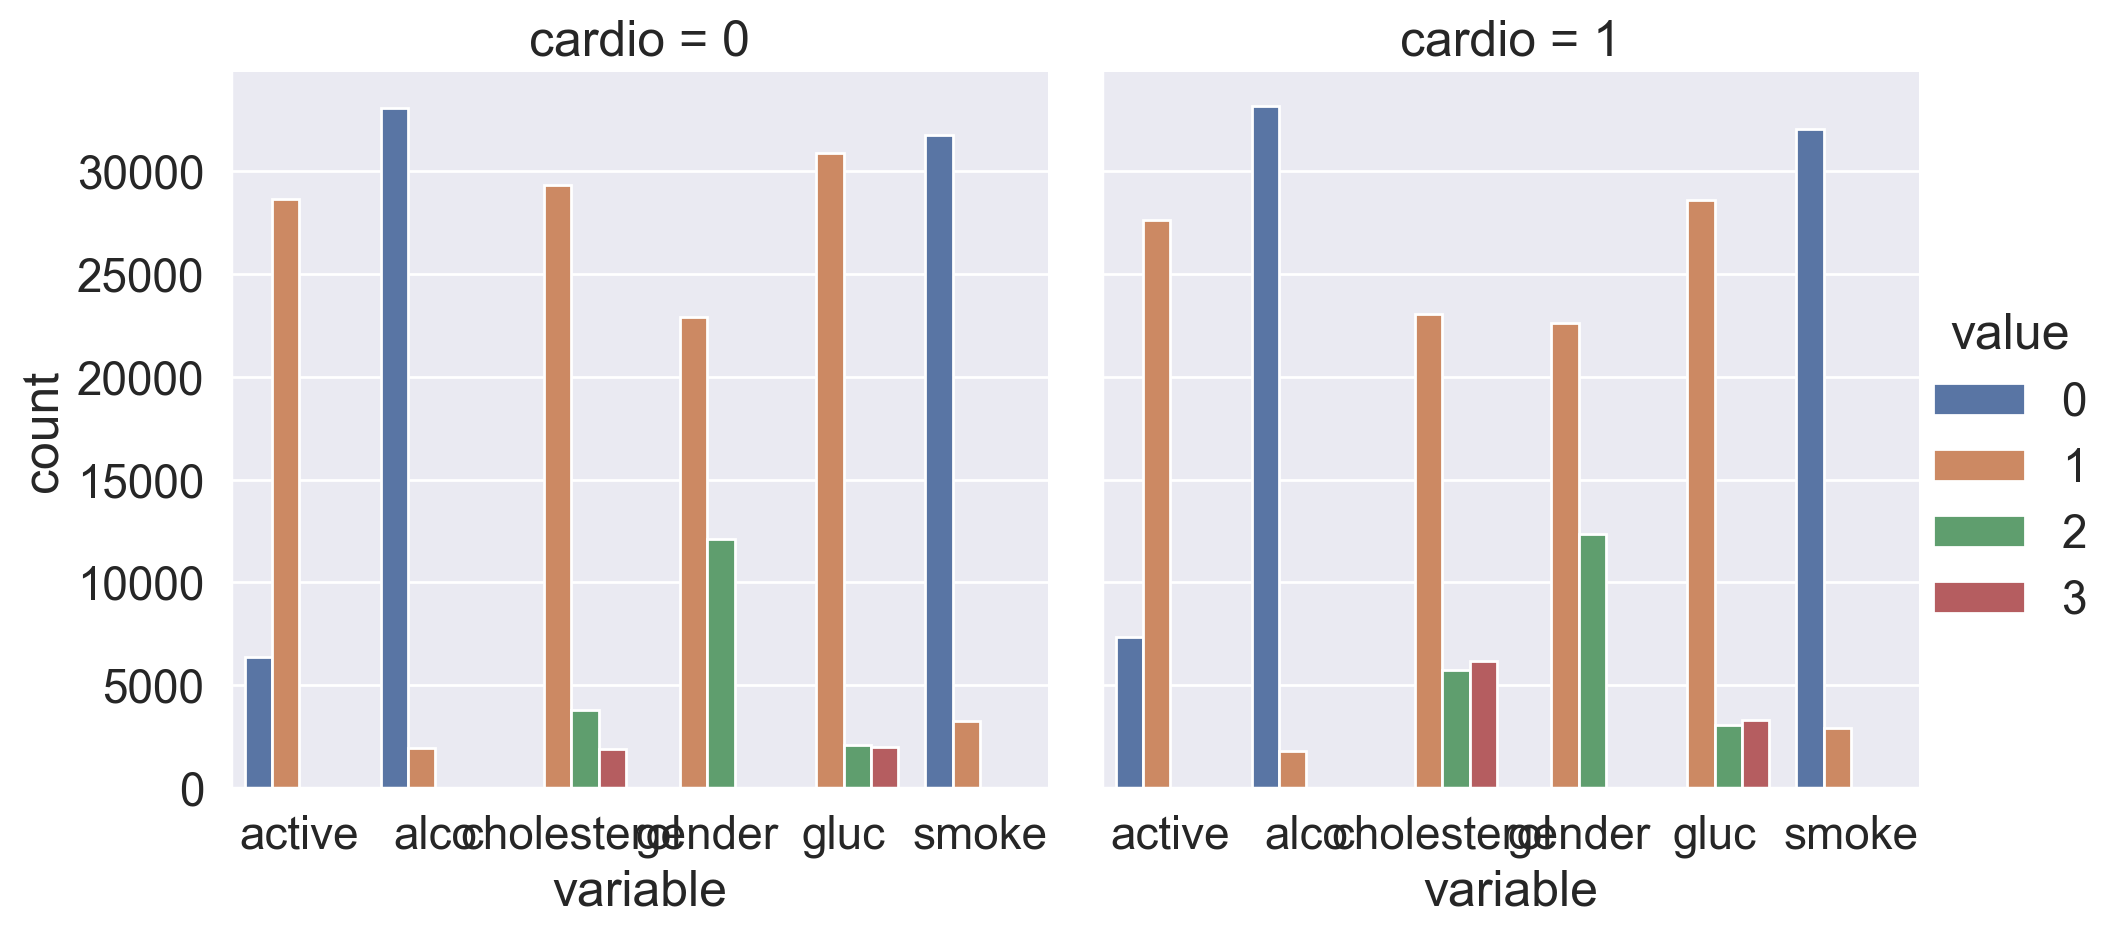

In [7]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
);

In [8]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


<AxesSubplot: xlabel='gender', ylabel='count'>

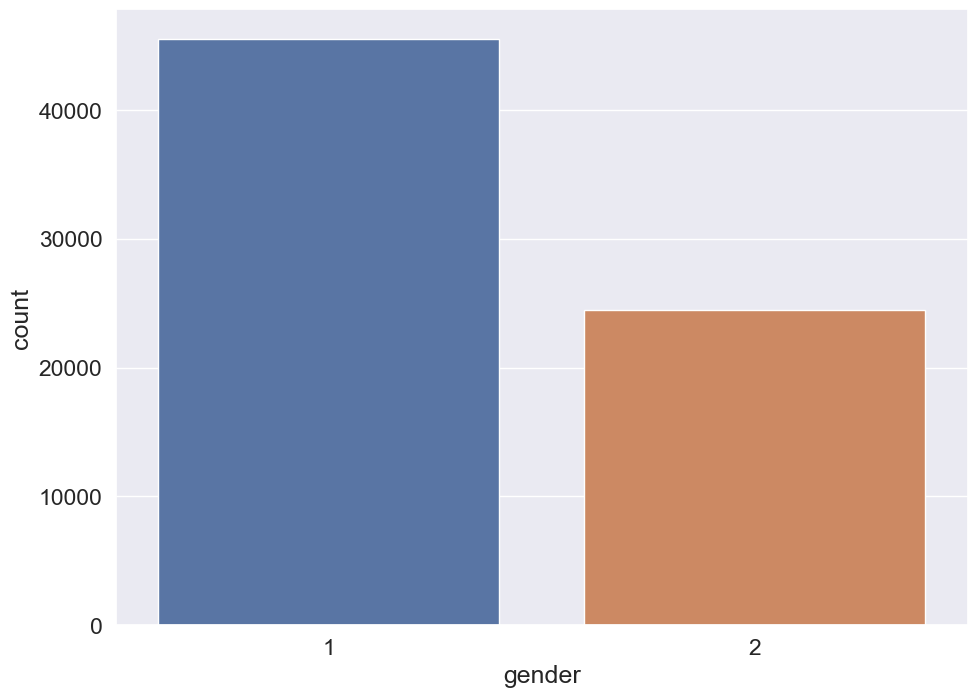

In [36]:
sns.countplot(x=df['gender'])

## Женщины - гендер1, мужчины - гендер2

In [53]:
print(df[(df['gender'] == 1) & (df['alco'] == 1)].nunique()[0] / df[(df['gender'] == 1)].nunique()[0], '- women')
print(df[(df['gender'] == 2) & (df['alco'] == 1)].nunique()[0] / df[(df['gender'] == 2)].nunique()[0], '- men')

0.02549967054689216 - women
0.10637515324887617 - men


In [54]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [62]:
(df.groupby('gender')['smoke'].mean()[2] - df.groupby('gender')['smoke'].mean()[1]) * 100

20.102390309976737

In [72]:
(df[df["smoke"] == 0]["age"].median() - df[df["smoke"] == 1]["age"].median()) / 365.25 * 12

19.613963039014372

In [69]:
df.groupby('smoke')['age'].mean()

smoke
0    19505.400730
1    19090.836927
Name: age, dtype: float64

## 2. RISK MAPS

In [73]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### df2 - Курящие мужчины (60-64г.)

In [79]:
df2 = df[(df['gender'] == 2) & (df['smoke'] == 1) & (365.25 * 64 >= df2['age']) & (df2['age'] >= 365.25 * 60)]
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
67,90,22099,2,171,97.0,150,100,3,1,1,0,1,1
182,248,22671,2,174,74.0,130,80,3,1,1,0,1,1
230,318,23376,2,175,75.0,180,100,3,1,1,1,1,1
297,410,22415,2,173,70.0,130,70,2,1,1,1,1,0
327,456,22583,2,170,65.5,150,80,1,1,1,0,1,1


In [84]:
df2[(df2['cholesterol'] == 1) & (df2['ap_hi'] >= 160) & (df2['ap_hi'] < 180)]['cardio'].mean() \
/  df2[(df2['cholesterol'] == 1) & (df2['ap_hi'] < 120)]['cardio'].mean() 

3.2136752136752134

## 1.3 Analyzing BMI

In [158]:
df['BMI'] = df['weight'] / df['height'] ** 2 * 10000
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [87]:
df.groupby('gender')['BMI'].mean()

gender
1    27.987583
2    26.754442
Name: BMI, dtype: float64

In [89]:
df.groupby('cardio')['BMI'].median()

cardio
0    25.476660
1    27.471384
Name: BMI, dtype: float64

In [92]:
df.groupby(['gender', 'alco', 'cardio'])['BMI'].median().to_frame()

BMI
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

## 1.4. Cleaning data

In [94]:
df_remove = df[(df['ap_lo'] > df['ap_hi'])
            | (df['height'] < df['height'].quantile(0.025))
            | (df['height'] > df['height'].quantile(0.0975))
            | (df['weight'] < df['weight'].quantile(0.025))
            | (df['weight'] > df['weight'].quantile(0.0975))]

In [93]:
 pd.Series.quantile?

In [97]:
df_remove.shape[0] / df.shape[0]

0.9868857142857143

## Part 2. Visual data analysis 
2.1. Correlation matrix visualization

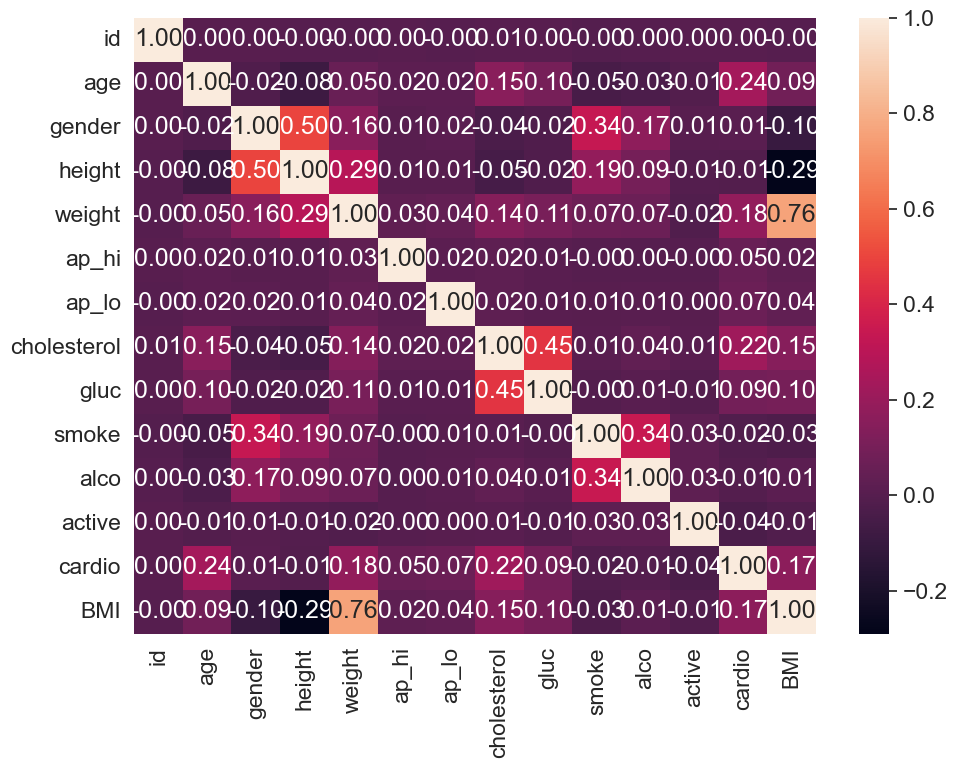

In [129]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, fmt = '.2f');

## 2.2. Height distribution of men and women

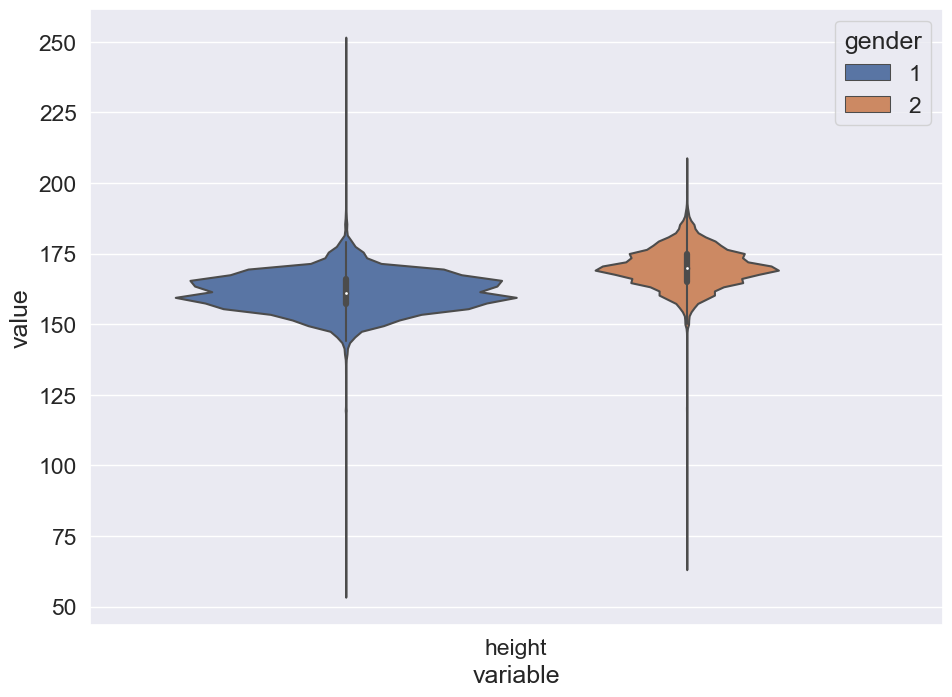

In [135]:
df2 = pd.melt(df, value_vars='height', id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', scale = 'count', data=df2)
plt.show()

## 2.3. Rank correlation

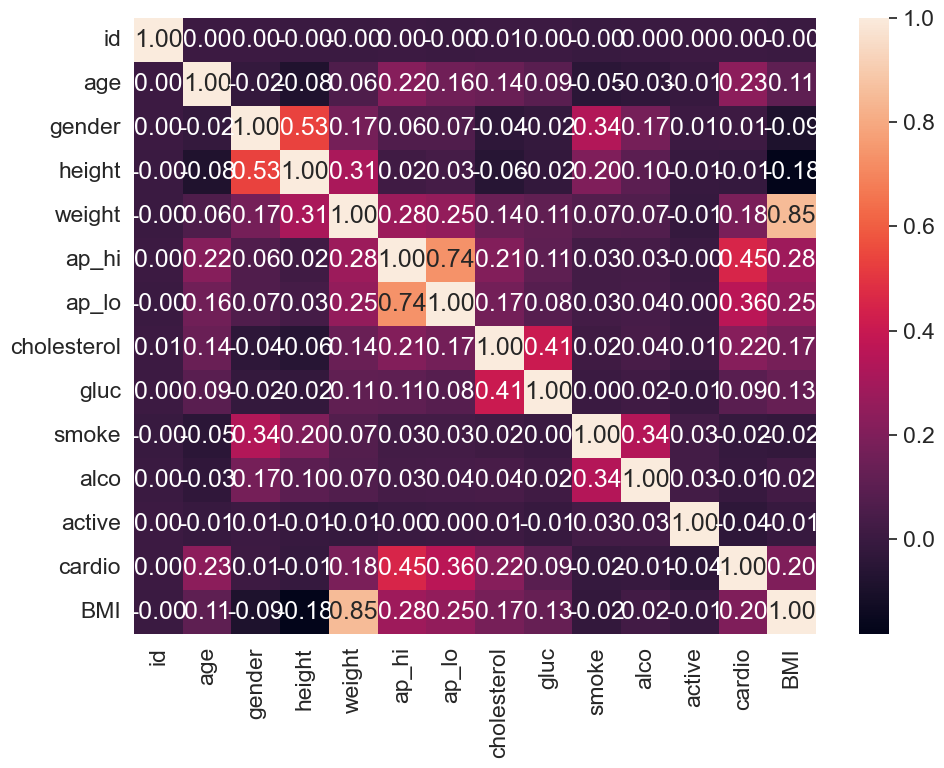

In [145]:
df_corr = df.corr('spearman')
sns.heatmap(df_corr, annot=True, fmt = '.2f');

In [ ]:
df_corr

In [162]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")

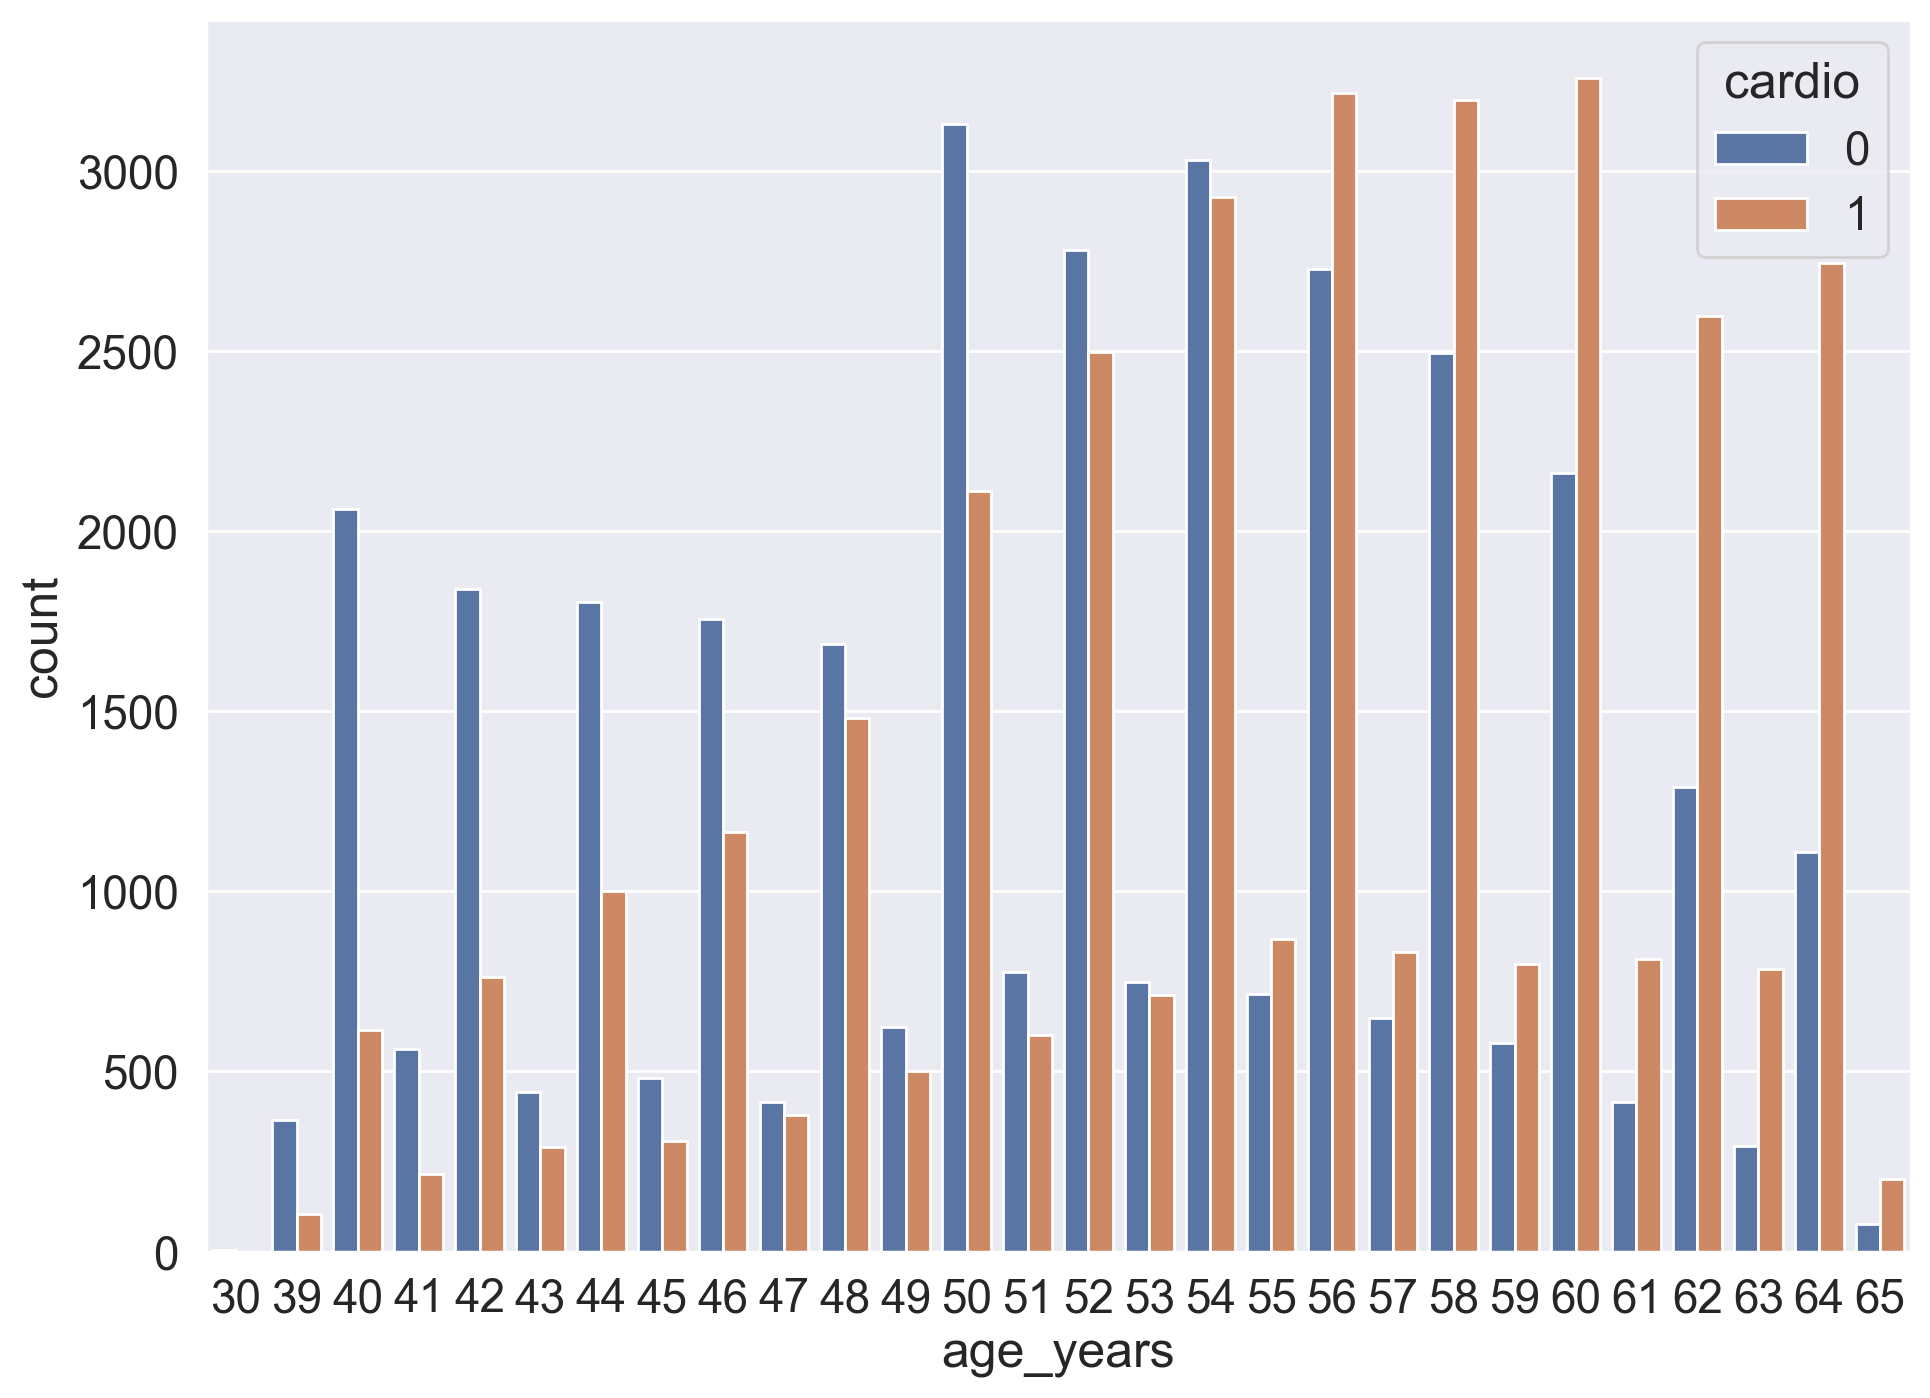

In [163]:
sns.countplot(x="age_years", hue="cardio", data=df);

In [161]:
sns.countplot?

In [165]:
!pip install pydotplus

     -------------------------------------- 278.7/278.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24554 sha256=0d3ad83c7cbf977fb8860b9e9da8cdf0965a61b473853a9909512a4df95057a7
  Stored in directory: c:\users\алексей\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [167]:
!pip install ipywidgets

     -------------------------------------- 137.8/137.8 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 384.3/384.3 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 5.7 MB/s eta 0:00:00


## ДЗ 3

### Part 1. Toy dataset “Will They? Won’t They?”

In [6]:
!pip install matplotlib
!pip install pandas

     ---------------------------------------- 7.2/7.2 MB 5.5 MB/s eta 0:00:00
     ------------------------------------- 160.2/160.2 kB 10.0 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 965.4/965.4 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 6.4 MB/s eta 0:00:00


In [1]:
%config Completer.use_jedi = False

In [5]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = a*b
d = np.dot(a,b
          )
d

32

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus  # pip install pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

ModuleNotFoundError: No module named 'pydotplus'

In [2]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out


# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [3]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]

In [4]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

NameError: name 'LabelEncoder' is not defined

In [173]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [174]:
# Some feature values are present in train and absent in test and vice-versa.
y = df_train["Will_go"]
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Money_spent_little,Looks_repulsive,Money_spent_lots,Alcoholic_beverage_no,Looks_handsome,Alcoholic_beverage_yes,Eloquence_high,Eloquence_average
0,0,0,1,0,1,1,1,0
1,1,0,0,0,1,1,0,0
2,0,0,1,1,1,0,0,1
3,1,1,0,1,0,0,0,1
4,0,1,1,0,0,1,0,0
5,0,1,1,0,0,1,1,0
6,0,0,1,0,1,1,0,1


In [175]:
df_test

,Money_spent_little,Looks_repulsive,Money_spent_lots,Alcoholic_beverage_no,Looks_handsome,Alcoholic_beverage_yes,Eloquence_high,Eloquence_average
0,0,0,1,1,1,0,0,1
1,1,0,0,0,1,1,1,0
2,0,1,1,0,0,1,0,1


In [ ]:
tree = DecisionTre